In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# profiling packages
from ydata_profiling import ProfileReport

# modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score

# helper functions
from modeling_help import evaluate_model
from cleaning_help import calculate_ratio, calculate_ratio_opposite

c:\Users\rober\venv\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/pre_processed/odds_w_game_id.csv')
df.head()

,id,away_rank,away_team_name,away_record,home_rank,home_team_name,home_record,season,date,away_team,...,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line
0,401426532,NaN,Austin Peay,(0-10-1Away),NaN,Western Kentucky,(1-01-0Home),2022-23,2022-08-27,Austin Peay,...,-112,0.0,Western Kentucky,38,-27.5,-112,0.0,64.5,-109,-109
1,401413256,NaN,Idaho State,(0-10-1Away),NaN,UNLV,(1-01-0Home),2022-23,2022-08-27,Idaho State,...,-112,0.0,UNLV,52,-23.0,-112,0.0,52.5,-109,-109
2,401405058,NaN,Wyoming,(0-10-1Away),NaN,Illinois,(1-01-0Home),2022-23,2022-08-27,Wyoming,...,-110,430.0,Illinois,38,-14.0,-110,-550.0,43.0,-110,-110
3,401411090,NaN,Duquesne,(0-10-1Away),NaN,Florida State,(1-01-0Home),2022-23,2022-08-27,Duquesne,...,-105,0.0,Florida State,47,-43.5,-125,0.0,54.5,-112,-112
4,401426530,NaN,Charlotte,(0-10-1CUSA),NaN,Florida Atlantic,(1-01-0CUSA),2022-23,2022-08-27,Charlotte,...,-110,235.0,Florida Atlantic,43,-7.0,-110,-275.0,59.0,-110,-110


#### cleaning

In [3]:
# drop season columns and date
df.drop(columns=['season', 'date', 'away_team_name', 'home_team_name'], inplace=True)
df.head()

,id,away_rank,away_record,home_rank,home_record,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line
0,401426532,NaN,(0-10-1Away),NaN,(1-01-0Home),Austin Peay,27,27.5,-112,0.0,Western Kentucky,38,-27.5,-112,0.0,64.5,-109,-109
1,401413256,NaN,(0-10-1Away),NaN,(1-01-0Home),Idaho State,21,23.0,-112,0.0,UNLV,52,-23.0,-112,0.0,52.5,-109,-109
2,401405058,NaN,(0-10-1Away),NaN,(1-01-0Home),Wyoming,6,14.0,-110,430.0,Illinois,38,-14.0,-110,-550.0,43.0,-110,-110
3,401411090,NaN,(0-10-1Away),NaN,(1-01-0Home),Duquesne,7,43.5,-105,0.0,Florida State,47,-43.5,-125,0.0,54.5,-112,-112
4,401426530,NaN,(0-10-1CUSA),NaN,(1-01-0CUSA),Charlotte,13,7.0,-110,235.0,Florida Atlantic,43,-7.0,-110,-275.0,59.0,-110,-110


In [4]:
# for away_record and home_record could you remove the parenthesis and split the text into two columns on the first alphanumeric character and I still want to keep the second part of the split put this into a column named conference
df['away_record'] = df['away_record'].str.replace('(', '').str.replace(')', '').str.replace(' ', '')
df['home_record'] = df['home_record'].str.replace('(', '').str.replace(')', '').str.replace(' ', '')

# Define the regular expression to split on the first alphabetic character
regex = r'([0-9\-]+)([A-Za-z]+)'

# Apply the regular expression to split the column
df[['away_record', 'away_conference']] = df['away_record'].str.extract(regex)
df[['home_record', 'home_conference']] = df['home_record'].str.extract(regex)
df.head()

,id,away_rank,away_record,home_rank,home_record,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line,away_conference,home_conference
0,401426532,NaN,0-10-1,NaN,1-01-0,Austin Peay,27,27.5,-112,0.0,Western Kentucky,38,-27.5,-112,0.0,64.5,-109,-109,Away,Home
1,401413256,NaN,0-10-1,NaN,1-01-0,Idaho State,21,23.0,-112,0.0,UNLV,52,-23.0,-112,0.0,52.5,-109,-109,Away,Home
2,401405058,NaN,0-10-1,NaN,1-01-0,Wyoming,6,14.0,-110,430.0,Illinois,38,-14.0,-110,-550.0,43.0,-110,-110,Away,Home
3,401411090,NaN,0-10-1,NaN,1-01-0,Duquesne,7,43.5,-105,0.0,Florida State,47,-43.5,-125,0.0,54.5,-112,-112,Away,Home
4,401426530,NaN,0-10-1,NaN,1-01-0,Charlotte,13,7.0,-110,235.0,Florida Atlantic,43,-7.0,-110,-275.0,59.0,-110,-110,CUSA,CUSA


In [5]:
# if away_conference or home_conference have the values 'Away' or 'Home' respectively, replace them with the value null
df['away_conference'] = df['away_conference'].replace('Away', np.nan)
df['home_conference'] = df['home_conference'].replace('Home', np.nan)

# just make 1 column for the conference and use the home_conference value
df['conference'] = df['home_conference']

# make a column called conference_game_ind if conference is not null then 1 else 0
df['conference_game_ind'] = df['conference'].notnull().astype(int)

# drop the away_conference and home_conference columns
df.drop(columns=['away_conference', 'home_conference', 'conference'], inplace=True)
df.head()

,id,away_rank,away_record,home_rank,home_record,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line,conference_game_ind
0,401426532,NaN,0-10-1,NaN,1-01-0,Austin Peay,27,27.5,-112,0.0,Western Kentucky,38,-27.5,-112,0.0,64.5,-109,-109,0
1,401413256,NaN,0-10-1,NaN,1-01-0,Idaho State,21,23.0,-112,0.0,UNLV,52,-23.0,-112,0.0,52.5,-109,-109,0
2,401405058,NaN,0-10-1,NaN,1-01-0,Wyoming,6,14.0,-110,430.0,Illinois,38,-14.0,-110,-550.0,43.0,-110,-110,0
3,401411090,NaN,0-10-1,NaN,1-01-0,Duquesne,7,43.5,-105,0.0,Florida State,47,-43.5,-125,0.0,54.5,-112,-112,0
4,401426530,NaN,0-10-1,NaN,1-01-0,Charlotte,13,7.0,-110,235.0,Florida Atlantic,43,-7.0,-110,-275.0,59.0,-110,-110,1


In [6]:
## would be nice to find a way to split the record columns into conference vs non conference records but for lack of a better way to do this now I am just going to remove the '-' as this would still procude a higher number for better records
df['away_record'] = df['away_record'].str.replace('-', '')
df['home_record'] = df['home_record'].str.replace('-', '')

# also convert the record columns to numeric
df['away_record'] = pd.to_numeric(df['away_record'])
df['home_record'] = pd.to_numeric(df['home_record'])

# get unique values for away_team and home_team and put into 1 list
teams = list(df.away_team.unique()) + list(df.home_team.unique())
teams = list(set(teams))

# create a dictionary with team names as keys and values as integers
team_dict = {team: i for i, team in enumerate(teams)}

# map the team names to the integers
df['away_team'] = df['away_team'].map(team_dict)
df['home_team'] = df['home_team'].map(team_dict)

# for away_rank and home_rank columns could you replace NaN with 999 and convert column to integer
df['away_rank'] = df['away_rank'].fillna(999).astype(int)
df['home_rank'] = df['home_rank'].fillna(999).astype(int)

# where away_point_spread == 'PK' set to the opposite of home_point_spread
df.loc[df['away_point_spread'] == 'PK', 'away_point_spread'] = df['home_point_spread'] * -1
df['away_point_spread'] = df['away_point_spread'].astype(float)

# create a new column for the target variable as a binary outcome 1 for home team win and 0 for away team win
df['target'] = df['home_score'] > df['away_score']
df['target'] = df['target'].astype(int)
df.head()

,id,away_rank,away_record,home_rank,home_record,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,home_team,home_score,home_point_spread,home_point_spread_line,home_money_line,over_under,over_line,under_line,conference_game_ind,target
0,401426532,999,101.0,999,1010.0,65,27,27.5,-112,0.0,8,38,-27.5,-112,0.0,64.5,-109,-109,0,1
1,401413256,999,101.0,999,1010.0,49,21,23.0,-112,0.0,77,52,-23.0,-112,0.0,52.5,-109,-109,0,1
2,401405058,999,101.0,999,1010.0,191,6,14.0,-110,430.0,212,38,-14.0,-110,-550.0,43.0,-110,-110,0,1
3,401411090,999,101.0,999,1010.0,157,7,43.5,-105,0.0,219,47,-43.5,-125,0.0,54.5,-112,-112,0,1
4,401426530,999,101.0,999,1010.0,25,13,7.0,-110,235.0,136,43,-7.0,-110,-275.0,59.0,-110,-110,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1145 non-null   int64  
 1   away_rank               1145 non-null   int32  
 2   away_record             1136 non-null   float64
 3   home_rank               1145 non-null   int32  
 4   home_record             1136 non-null   float64
 5   away_team               1145 non-null   int64  
 6   away_score              1145 non-null   int64  
 7   away_point_spread       1145 non-null   float64
 8   away_point_spread_line  1145 non-null   int64  
 9   away_money_line         1145 non-null   float64
 10  home_team               1145 non-null   int64  
 11  home_score              1145 non-null   int64  
 12  home_point_spread       1145 non-null   float64
 13  home_point_spread_line  1145 non-null   int64  
 14  home_money_line         1145 non-null   

#### now lets join in our game stats

In [8]:
# conver id column to string
df['id'] = df['id'].astype(str)

In [9]:
game_stats_df = pd.read_csv('data/data_crawling/table_stats/2022/game_stats.csv')
game_stats_df.head()

,first_downs_away,third_down_away,fourth_down_away,total_yards_away,passing_away,comp_att_away,yards_per_pass_away,rushing_away,rushing_att_away,yards_per_rush_away,...,yards_per_pass_home,rushing_home,rushing_att_home,yards_per_rush_home,penalty_home,turnovers_home,int_thrown_home,fumbles_lost_home,possession_home,game_id
0,19,7-18,2-2,319,156,15-21,7.4,163,48,3.4,...,8.4,107,32,3.3,8-86,1,1,0,27:31,401426532
1,23,9-16,0-0,465,355,25-42,8.5,110,31,3.5,...,8.3,214,47,4.6,8-65,1,0,1,34:14,401405059
2,13,5-17,4-4,241,191,14-27,7.1,50,40,1.3,...,11.6,149,33,4.5,7-65,0,0,0,30:24,401413256
3,21,6-15,1-1,364,119,13-33,3.6,245,39,6.3,...,9.1,261,54,4.8,6-60,2,0,2,31:43,401404146
4,10,1-12,0-1,212,30,5-20,1.5,182,31,5.9,...,5.4,258,41,6.3,7-80,0,0,0,36:36,401405058


In [10]:
game_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   first_downs_away     1556 non-null   int64  
 1   third_down_away      1556 non-null   object 
 2   fourth_down_away     1556 non-null   object 
 3   total_yards_away     1556 non-null   int64  
 4   passing_away         1556 non-null   int64  
 5   comp_att_away        1556 non-null   object 
 6   yards_per_pass_away  1556 non-null   float64
 7   rushing_away         1556 non-null   int64  
 8   rushing_att_away     1556 non-null   int64  
 9   yards_per_rush_away  1556 non-null   float64
 10  penalty_away         1556 non-null   object 
 11  turnovers_away       1556 non-null   int64  
 12  int_thrown_away      1556 non-null   int64  
 13  fumbles_lost_away    1556 non-null   int64  
 14  possession_away      1556 non-null   object 
 15  first_downs_home     1556 non-null   i

In [11]:
game_stats_df['game_id'] = game_stats_df['game_id'].astype(str)

In [12]:
# for third_down, fourth_down, comp_att split the column by '-' and divide the first number by the second number to form a fraction without using helper functions. Also you will need to handle division by zero

game_stats_df['third_down_away'] = game_stats_df['third_down_away'].apply(calculate_ratio)
game_stats_df['third_down_home'] = game_stats_df['third_down_home'].apply(calculate_ratio)
game_stats_df['fourth_down_away'] = game_stats_df['fourth_down_away'].apply(calculate_ratio)
game_stats_df['fourth_down_home'] = game_stats_df['fourth_down_home'].apply(calculate_ratio)
game_stats_df['comp_att_away'] = game_stats_df['comp_att_away'].apply(calculate_ratio)
game_stats_df['comp_att_home'] = game_stats_df['comp_att_home'].apply(calculate_ratio)

# for penalty_home and penalty_away do the same as above but take the second number divided by the first number
game_stats_df['penalty_away'] = game_stats_df['penalty_away'].apply(calculate_ratio_opposite)
game_stats_df['penalty_home'] = game_stats_df['penalty_home'].apply(calculate_ratio_opposite)

## change possession into float
game_stats_df['possession_away'] = game_stats_df['possession_away'].str.replace(':', '.')
game_stats_df['possession_home'] = game_stats_df['possession_home'].str.replace(':', '.')
game_stats_df['possession_away'] = game_stats_df['possession_away'].astype(float)
game_stats_df['possession_home'] = game_stats_df['possession_home'].astype(float)
game_stats_df.head()

,first_downs_away,third_down_away,fourth_down_away,total_yards_away,passing_away,comp_att_away,yards_per_pass_away,rushing_away,rushing_att_away,yards_per_rush_away,...,yards_per_pass_home,rushing_home,rushing_att_home,yards_per_rush_home,penalty_home,turnovers_home,int_thrown_home,fumbles_lost_home,possession_home,game_id
0,19,0.388889,1.0,319,156,0.714286,7.4,163,48,3.4,...,8.4,107,32,3.3,10.750000,1,1,0,27.31,401426532
1,23,0.562500,inf,465,355,0.595238,8.5,110,31,3.5,...,8.3,214,47,4.6,8.125000,1,0,1,34.14,401405059
2,13,0.294118,1.0,241,191,0.518519,7.1,50,40,1.3,...,11.6,149,33,4.5,9.285714,0,0,0,30.24,401413256
3,21,0.400000,1.0,364,119,0.393939,3.6,245,39,6.3,...,9.1,261,54,4.8,10.000000,2,0,2,31.43,401404146
4,10,0.083333,0.0,212,30,0.250000,1.5,182,31,5.9,...,5.4,258,41,6.3,11.428571,0,0,0,36.36,401405058


In [13]:
game_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   first_downs_away     1556 non-null   int64  
 1   third_down_away      1545 non-null   float64
 2   fourth_down_away     1543 non-null   float64
 3   total_yards_away     1556 non-null   int64  
 4   passing_away         1556 non-null   int64  
 5   comp_att_away        1545 non-null   float64
 6   yards_per_pass_away  1556 non-null   float64
 7   rushing_away         1556 non-null   int64  
 8   rushing_att_away     1556 non-null   int64  
 9   yards_per_rush_away  1556 non-null   float64
 10  penalty_away         1545 non-null   float64
 11  turnovers_away       1556 non-null   int64  
 12  int_thrown_away      1556 non-null   int64  
 13  fumbles_lost_away    1556 non-null   int64  
 14  possession_away      1556 non-null   float64
 15  first_downs_home     1556 non-null   i

In [21]:
# join game_stats_df and df on game_id
df_modeling_ready = df.merge(game_stats_df, how='inner', left_on='id', right_on='game_id')
print("Number of Games for Training: ", len(df_modeling_ready))
df_modeling_ready.head()

Number of Games for Training:  1145


,id,away_rank,away_record,home_rank,home_record,away_team,away_score,away_point_spread,away_point_spread_line,away_money_line,...,yards_per_pass_home,rushing_home,rushing_att_home,yards_per_rush_home,penalty_home,turnovers_home,int_thrown_home,fumbles_lost_home,possession_home,game_id
0,401426532,999,101.0,999,1010.0,65,27,27.5,-112,0.0,...,8.4,107,32,3.3,10.750000,1,1,0,27.31,401426532
1,401413256,999,101.0,999,1010.0,49,21,23.0,-112,0.0,...,11.6,149,33,4.5,9.285714,0,0,0,30.24,401413256
2,401405058,999,101.0,999,1010.0,191,6,14.0,-110,430.0,...,5.4,258,41,6.3,11.428571,0,0,0,36.36,401405058
3,401411090,999,101.0,999,1010.0,157,7,43.5,-105,0.0,...,10.5,406,54,7.5,11.000000,1,1,0,35.13,401411090
4,401426530,999,101.0,999,1010.0,25,13,7.0,-110,235.0,...,10.6,218,49,4.4,9.000000,0,0,0,34.56,401426530


In [22]:
# replace any null value with 0
df_modeling_ready.fillna(0, inplace=True)

In [25]:
# replace inf values with 0
df_modeling_ready.replace([np.inf, -np.inf], 0, inplace=True)

### Modeling work ready

In [26]:
# remove home score and away score columns and store into a new dataframe
df_model_ready = df_modeling_ready.drop(['home_score', 'away_score', 'id', 'game_id'], axis=1)

# create x and y variables
X = df_model_ready.drop('target', axis=1)
y = df_model_ready['target']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Model Evaluation on Test Data:
Accuracy: 0.8995633187772926
ROC AUC Score: 0.8987233696536022
[[ 77   9]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        86
           1       0.93      0.90      0.92       143

    accuracy                           0.90       229
   macro avg       0.89      0.90      0.89       229
weighted avg       0.90      0.90      0.90       229



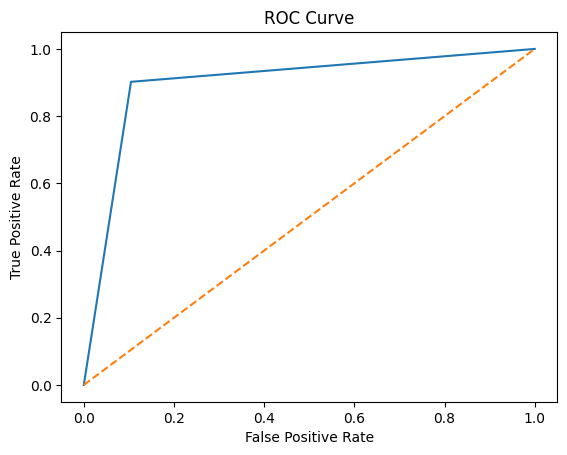

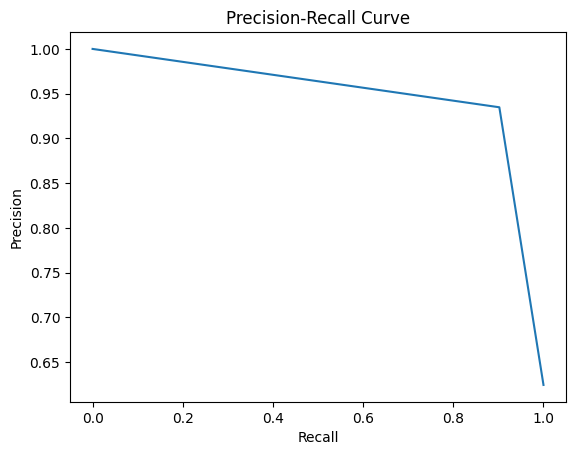

Model Evaluation on Train Data: Want to see how this may be overfitting...
Accuracy: 0.8919213973799127
ROC AUC Score: 0.8873527101335429
[[327  53]
 [ 46 490]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       380
           1       0.90      0.91      0.91       536

    accuracy                           0.89       916
   macro avg       0.89      0.89      0.89       916
weighted avg       0.89      0.89      0.89       916



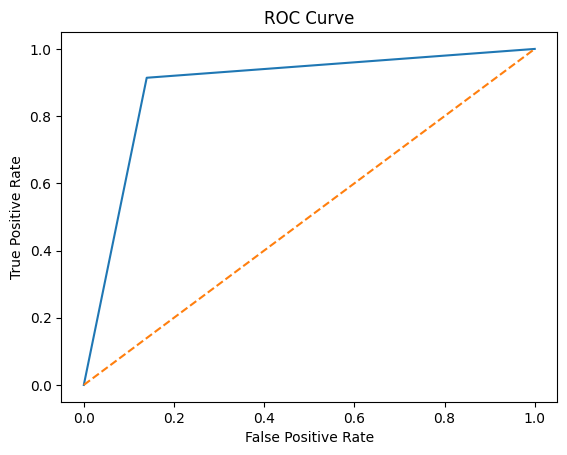

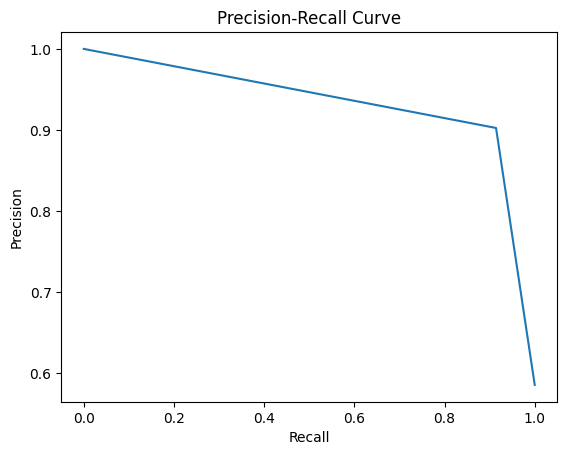

In [27]:
# create a logistic regression model
# log_reg_model = LogisticRegression()

# perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}
# create a grid search object
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')

# fit the grid search object to the training data
grid_log_reg.fit(X_train, y_train)

# get the best hyperparameters
print(grid_log_reg.best_params_)

# create a logistic regression model with the best hyperparameters from grid_log_reg.best_params_
log_reg_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# use evaluate_model function to evaluate the model
accuracy_log_reg, roc_auc_score_var_log_reg, conf_matrix_log_reg, class_report_log_reg, fpr_log_reg, tpr_log_reg, precision_log_reg, recall_log_reg = evaluate_model(log_reg_model, X_train, y_train, X_test, y_test)

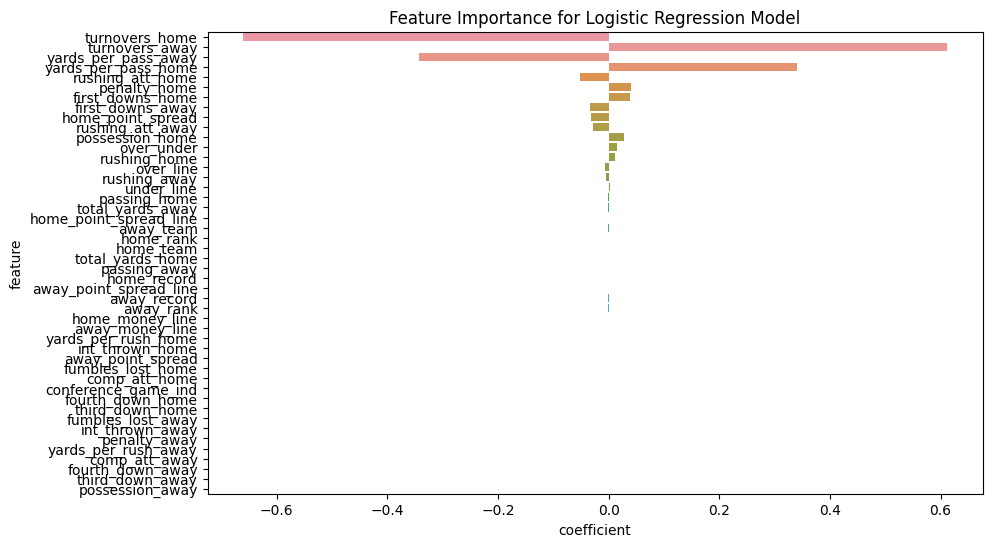

In [43]:
# can you do some feature importance analysis on the logistic regression model
# get the coefficients of the logistic regression model
coefficients = log_reg_model.coef_[0]

# get the feature names
features = X_train.columns

# create a dataframe of the coefficients and feature names
coefficients_df = pd.DataFrame({'feature': features, 'coefficient': coefficients})

# sort the dataframe by the absolute value of the coefficients
coefficients_df['abs_coefficient'] = coefficients_df['coefficient'].abs()
coefficients_df = coefficients_df.sort_values('abs_coefficient', ascending=False)

# plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coefficients_df)
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

#### Random Forest

Model Evaluation on Test Data:
Accuracy: 0.8558951965065502
ROC AUC Score: 0.8405838347698814
[[ 67  19]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        86
           1       0.87      0.90      0.89       143

    accuracy                           0.86       229
   macro avg       0.85      0.84      0.84       229
weighted avg       0.85      0.86      0.85       229



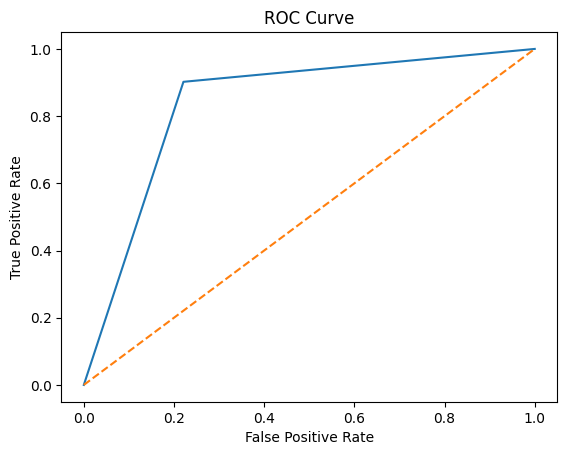

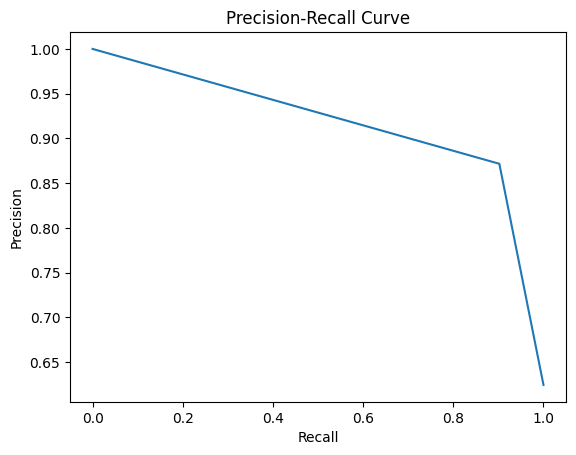

Model Evaluation on Train Data: Want to see how this may be overfitting...
Accuracy: 0.9377729257641921
ROC AUC Score: 0.9334249803613512
[[345  35]
 [ 22 514]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       380
           1       0.94      0.96      0.95       536

    accuracy                           0.94       916
   macro avg       0.94      0.93      0.94       916
weighted avg       0.94      0.94      0.94       916



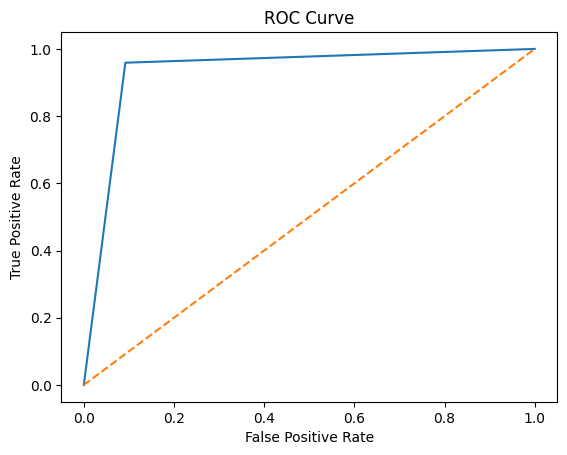

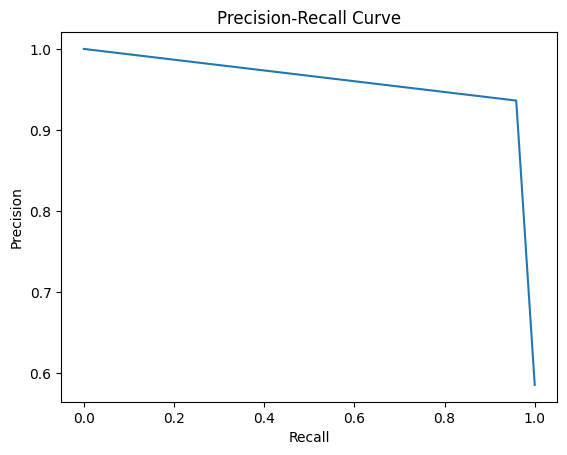

In [42]:
# can you run the same analysis as above but using a random forest classifier?
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
# rf_model = RandomForestClassifier() -- overfitting very badly

# perform hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
grid_search.best_params_

# # create a random forest classifier with the best hyperparameters
# rf_model = RandomForestClassifier(**grid_search.best_params_)
# accuracy_rf, roc_auc_score_var_rf, conf_matrix_rf, class_report_rf, fpr_rf, tpr_rf, precision_rf, recall_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# create a random forest classifier with the best hyperparameters
rf_model = RandomForestClassifier(n_estimators=10, max_depth=6, max_features = 'log2', min_samples_leaf=1, min_samples_split=2, random_state=42)
accuracy_rf, roc_auc_score_var_rf, conf_matrix_rf, class_report_rf, fpr_rf, tpr_rf, precision_rf, recall_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

In [37]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

#### lgb classifier

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 536, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5308
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585153 -> initscore=0.343963
[LightGBM] [Info] Start training from score 0.343963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

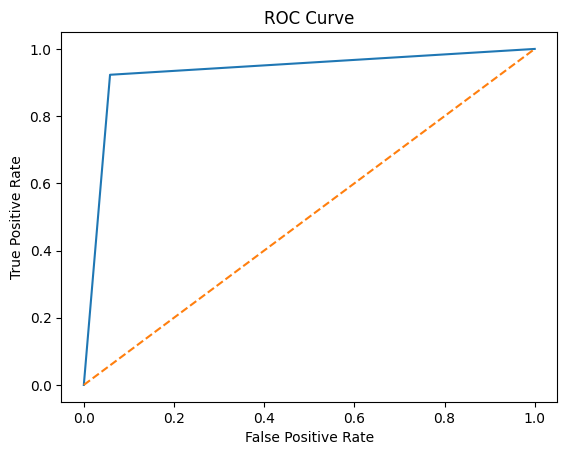

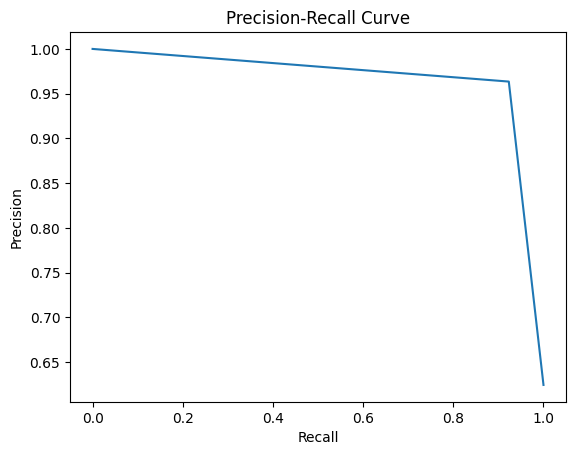

Model Evaluation on Train Data: Want to see how this may be overfitting...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy: 1.0
ROC AUC Score: 1.0
[[380   0]
 [  0 536]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       536

    accuracy                           1.00       916
   macro avg       1.00      1.00      1.00       916
weighted avg       1.00      1.00      1.00       916



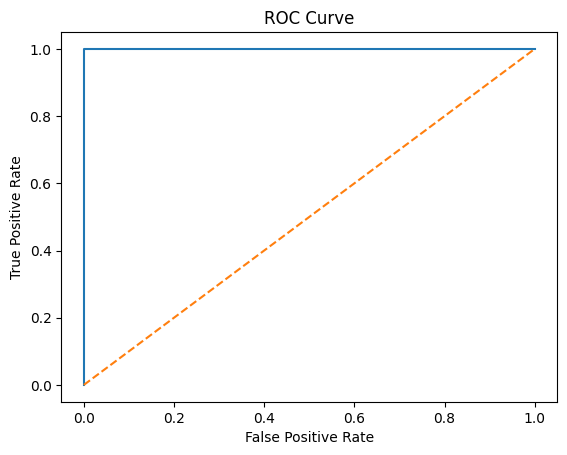

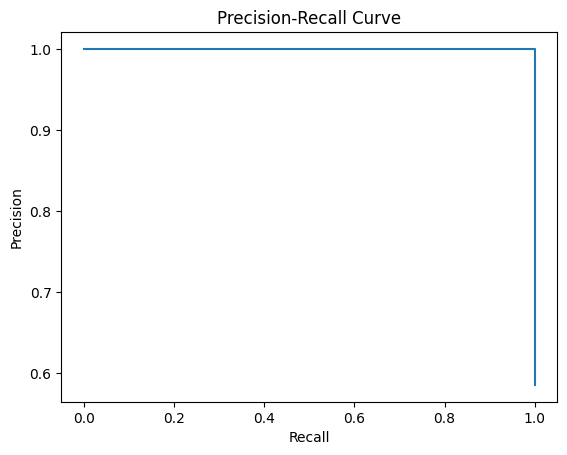

In [34]:
# run same analysis as above but with lightgbm
from lightgbm import LGBMClassifier

# # create a lightgbm classifier
# lgbm_model = LGBMClassifier()

# perform hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 1]
}

# create a grid search object
grid_search = GridSearchCV(LGBMClassifier(), param_grid, cv=3, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
grid_search.best_params_

# create a lightgbm classifier with the best hyperparameters
lgbm_model = LGBMClassifier(**grid_search.best_params_)
accuracy_lgbm, roc_auc_score_var_lgbm, conf_matrix_lgbm, class_report_lgbm, fpr_lgbm, tpr_lgbm, precision_lgbm, recall_lgbm = evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)